In [1]:
%load_ext autoreload
%autoreload 2
import os
import glob
import json

outs = {}


for filename in sorted([f for f in glob.glob("../output/*.json") if "test" not in f]): 
    model_name = os.path.basename(filename).split(".")[0]
    print(model_name)
    with open(filename) as f:
        outs[model_name] = json.load(f)

bertin
beto-cased-10000
beto-cased-20000
beto-cased-2500
beto-cased-5000
beto-cased
beto-uncased-10000
beto-uncased-20000
beto-uncased-2500
beto-uncased-5000
beto-uncased
roberta-bne
robertuito-cased
robertuito-deacc
robertuito-uncased-200k
robertuito-uncased


In [10]:
import pandas as pd
tasks = {
    "hate",
    "sentiment",
    "emotion",
    "irony",
}

data = []
models = ["robertuito-cased", "robertuito-uncased", "robertuito-deacc"]

for task in tasks:
    for model in models:
        for run in outs[model][task]:
            data.append({
                "model": model,
                "task": task,
                "macro_f1": run["eval_macro_f1"],
            })
df = pd.DataFrame(data)

<AxesSubplot:xlabel='task', ylabel='macro_f1'>

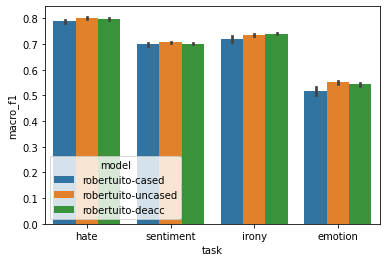

In [13]:
import seaborn as sns

sns.barplot(x="task", y="macro_f1", hue="model", data=df)

In [51]:
import scipy.stats
import scikit_posthocs as sp


for task in tasks:
    print("="*80)
    print(task.upper())
    data = [ 
            df[(df["model"] == model) & (df["task"] == task)]["macro_f1"] for model in models
    ]
    kruskal = scipy.stats.kruskal(*data)
    print(kruskal)
    print("Post-hoc")
    print(sp.posthoc_dunn(df[df["task"] == task], group_col="model", val_col="macro_f1", p_adjust="fdr_bh"))
    

HATE
KruskalResult(statistic=6.882430798320244, pvalue=0.03202573760955022)
Post-hoc
                    robertuito-cased  robertuito-deacc  robertuito-uncased
robertuito-cased            1.000000          0.070038            0.039868
robertuito-deacc            0.070038          1.000000            0.626373
robertuito-uncased          0.039868          0.626373            1.000000
SENTIMENT
KruskalResult(statistic=9.903023107534697, pvalue=0.007072710063591997)
Post-hoc
                    robertuito-cased  robertuito-deacc  robertuito-uncased
robertuito-cased            1.000000          0.148007            0.134551
robertuito-deacc            0.148007          1.000000            0.005007
robertuito-uncased          0.134551          0.005007            1.000000
IRONY
KruskalResult(statistic=11.850968493722924, pvalue=0.002670514183925705)
Post-hoc
                    robertuito-cased  robertuito-deacc  robertuito-uncased
robertuito-cased            1.000000          0.001773       

In [46]:
df

,model,task,macro_f1
0,robertuito-cased,hate,0.789273
1,robertuito-cased,hate,0.802306
2,robertuito-cased,hate,0.787825
3,robertuito-cased,hate,0.776156
4,robertuito-cased,hate,0.796889
...,...,...,...
175,robertuito-deacc,emotion,0.556116
176,robertuito-deacc,emotion,0.553408
177,robertuito-deacc,emotion,0.531016
178,robertuito-deacc,emotion,0.549580


In [44]:
sp.posthoc_dunn?

Signature: sp.posthoc_dunn(a, val_col=None, group_col=None, p_adjust=None, sort=True)
Docstring:
Post hoc pairwise test for multiple comparisons of mean rank sums
(Dunn's test). May be used after Kruskal-Wallis one-way analysis of
variance by ranks to do pairwise comparisons [1]_, [2]_.

Parameters
----------
a : array_like or pandas DataFrame object
    An array, any object exposing the array interface or a pandas DataFrame.
    Array must be two-dimensional. Second dimension may vary,
    i.e. groups may have different lengths.

val_col : str, optional
    Name of a DataFrame column that contains dependent variable values (test
    or response variable). Values should have a non-nominal scale. Must be
    specified if `a` is a pandas DataFrame object.

group_col : str, optional
    Name of a DataFrame column that contains independent variable values
    (grouping or predictor variable). Values should have a nominal scale
    (categorical). Must be specified if `a` is a pandas DataFra